In [4]:
#載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
#匯入資料（但所有變數名稱皆是隱藏，但需要預測最後TARGET CLASS是哪個）
#index_col=0代表設定第一行為index
df = pd.read_csv('/content/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件，只將所有`特徵值`做標準化
from sklearn.preprocessing import StandardScaler
features_to_scale = ["WTT", "PTI", "EQW", "SBI", "LQE", "QWG", "FDJ", "PJF", "HQE", "NXJ"]
df_subset = df[features_to_scale]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)
df_scaled = pd.DataFrame(df_scaled, columns=features_to_scale)
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [8]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/Classified Data',index_col=0)
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [13]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[91  7]
 [ 5 97]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        98
           1       0.93      0.95      0.94       102

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [29]:
#剛剛只先用了k=1來建立模型，現在利用for來建立迴圈(選擇不同k值)，並紀錄錯誤率
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
error_rate = []
k_values = range(1, 60)
min_error = float('inf')
best_k = None
# 迭代不同的k值
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rate.append(1 - accuracy_score(y_test, y_pred))
    if error < min_error:
        min_error = error
        best_k = k
for k, error in zip(k_values, error_rate):
    print(f'k={k}: Error Rate={error:.4f}')

k=1: Error Rate=0.0600
k=2: Error Rate=0.0650
k=3: Error Rate=0.0550
k=4: Error Rate=0.0500
k=5: Error Rate=0.0450
k=6: Error Rate=0.0500
k=7: Error Rate=0.0550
k=8: Error Rate=0.0550
k=9: Error Rate=0.0450
k=10: Error Rate=0.0400
k=11: Error Rate=0.0450
k=12: Error Rate=0.0400
k=13: Error Rate=0.0450
k=14: Error Rate=0.0350
k=15: Error Rate=0.0550
k=16: Error Rate=0.0400
k=17: Error Rate=0.0450
k=18: Error Rate=0.0450
k=19: Error Rate=0.0450
k=20: Error Rate=0.0450
k=21: Error Rate=0.0450
k=22: Error Rate=0.0500
k=23: Error Rate=0.0450
k=24: Error Rate=0.0500
k=25: Error Rate=0.0500
k=26: Error Rate=0.0500
k=27: Error Rate=0.0500
k=28: Error Rate=0.0550
k=29: Error Rate=0.0550
k=30: Error Rate=0.0500
k=31: Error Rate=0.0550
k=32: Error Rate=0.0500
k=33: Error Rate=0.0600
k=34: Error Rate=0.0600
k=35: Error Rate=0.0550
k=36: Error Rate=0.0550
k=37: Error Rate=0.0550
k=38: Error Rate=0.0550
k=39: Error Rate=0.0550
k=40: Error Rate=0.0600
k=41: Error Rate=0.0550
k=42: Error Rate=0.0600
k

Text(0, 0.5, 'Error Rate')

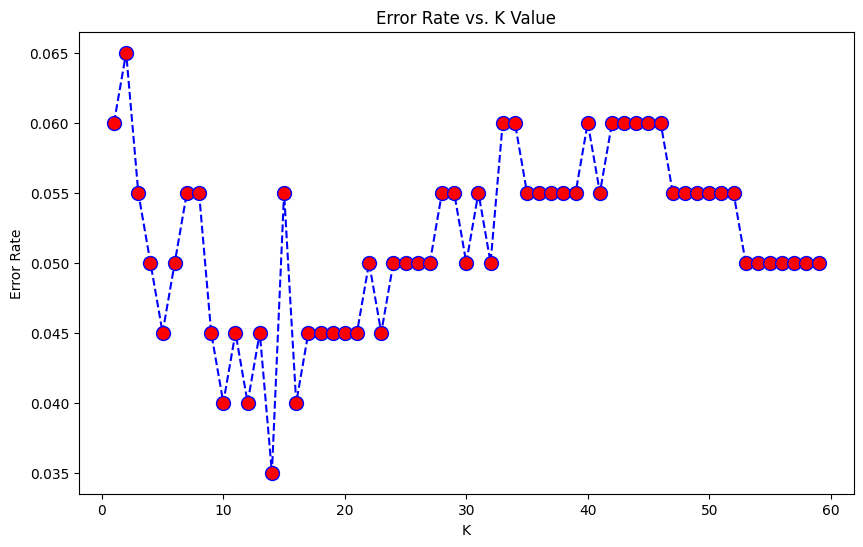

In [23]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[90  8]
 [ 6 96]]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.92      0.94      0.93       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [30]:
#選擇錯誤率最低的K=?????來看precision、recall、f1-score、support表現
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)
print("分類報告:")
print(classification_report(y_test, y_pred_best))

分類報告:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        98
           1       0.93      0.95      0.94       102

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

